## Goldsmiths University of London

### Team Lead..........: Carlos Alves (cdeol003) Student ID: 33617310
### Team Member..: Sandor Kanda (skand001) Student ID: 33635746
### Created...: 14/02/2023

## Data Mining Coursework - Part 2

## I. Import Libraries and Packages

In [1]:
# Import numpy for numerical computing
import numpy as np

# Import pandas for data manipulation
import pandas as pd

# Import matplotlib for visualization
import matplotlib.pyplot as plt

# Import seaborn for visualization
import seaborn as sns

# Import sklearn model selection for splitting data into training and testing sets, grid search for hyperparameter tuning and cross validation
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score

# Import sklearn metrics for k-nearest neighbors classifier
from sklearn.neighbors import KNeighborsClassifier

# Import sklearn metrics for decision tree classifier
from sklearn.tree import DecisionTreeClassifier

# Import sklearn metrics for random forest classifier, bagging classifier and adaboost classifier
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier, AdaBoostClassifier

# Import sklearn metrics for support vector machine classifier
from sklearn.svm import SVC

# Import sklearn metrics for accuracy score, confusion matrix and classification report
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Import RandomizedSearchCV for hyperparameter tuning
from sklearn.model_selection import RandomizedSearchCV

# Import optuna for hyperparameter tuning
import optuna

# Import cross_val_score for cross validation
from sklearn.model_selection import cross_val_score

# Import partial for partial function application
from functools import partial

# Import StandardScaler for scaling data
from sklearn.preprocessing import StandardScaler


c:\dev\project-env\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


## II. Data Inspection and Visualisation

### a. Loading the data and Renaming Columns

In [2]:
# Load the dataframes from the csv files
train_df = pd.read_csv("creditdefault_train.csv")
test_df = pd.read_csv("creditdefault_test.csv")

# Original column names:
# Y,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,X11,X12,X13,X14,X15,X16,X17,X18,X19,X20,X21,X22,X23
# X1: Amount of the given credit (NT dollar): it includes both the individual consumer credit and his/her family (supplementary) credit.
# X2: Gender (1 = male; 2 = female).
# X3: Education (1 = graduate school; 2 = university; 3 = high school; 4 = others).
# X4: Marital status (1 = married; 2 = single; 3 = others).
# X5: Age (year).
# X6 - X11: History of past payment. One tracked the past monthly payment records (from April to September, 2005) as follows: 
# X6 = the repayment status in September, 2005; 
# X7 = the repayment status in August, 2005; . . .;
# X11 = the repayment status in April, 2005. The measurement scale for the repayment status is: 
# -1 = pay duly; 1 = payment delay for one month; 2 = payment delay for two months; . . .; 
# 8 = payment delay for eight months; 9 = payment delay for nine months and above.
# X12-X17: Amount of bill statement (NT dollar). 
# X12 = amount of bill statement in September, 2005; 
# X13 = amount of bill statement in August, 2005; . . .; 
# X17 = amount of bill statement in April, 2005.
# X18-X23: Amount of previous payment (NT dollar). 
# X18 = amount paid in September, 2005; 
# X19 = amount paid in August, 2005; . . .;
# X23 = amount paid in April, 2005.

# Change the column names to actual variable names of the train dataframe
train_df = train_df.rename(columns={ 'Y': 'Credit Card Default',
                        'X1': 'Amount of the given credit',
                        'X2': 'Gender',
                        'X3': 'Education',
                        'X4': 'Marital status',
                        'X5': 'Age',
                        'X6': 'Repayment status in September, 2005',
                        'X7': 'Repayment status in August, 2005',
                        'X8': 'Repayment status in July, 2005',
                        'X9': 'Repayment status in June, 2005',
                        'X10': 'Repayment status in May, 2005',
                        'X11': 'Repayment status in April, 2005',
                        'X12': 'Amount of bill statement in September, 2005',
                        'X13': 'Amount of bill statement in August, 2005',
                        'X14': 'Amount of bill statement in July, 2005',
                        'X15': 'Amount of bill statement in June, 2005',
                        'X16': 'Amount of bill statement in May, 2005',
                        'X17': 'Amount of bill statement in April, 2005',
                        'X18': 'Amount paid in September, 2005',
                        'X19': 'Amount paid in August, 2005',
                        'X20': 'Amount paid in July, 2005',
                        'X21': 'Amount paid in June, 2005',
                        'X22': 'Amount paid in May, 2005',
                        'X23': 'Amount paid in April, 2005'})

# Change the column names to actual variable names of the test dataframe
test_df = train_df.rename(columns={ 'Y': 'Credit Card Default',
                        'X1': 'Amount of the given credit',
                        'X2': 'Gender',
                        'X3': 'Education',
                        'X4': 'Marital status',
                        'X5': 'Age',
                        'X6': 'Repayment status in September, 2005',
                        'X7': 'Repayment status in August, 2005',
                        'X8': 'Repayment status in July, 2005',
                        'X9': 'Repayment status in June, 2005',
                        'X10': 'Repayment status in May, 2005',
                        'X11': 'Repayment status in April, 2005',
                        'X12': 'Amount of bill statement in September, 2005',
                        'X13': 'Amount of bill statement in August, 2005',
                        'X14': 'Amount of bill statement in July, 2005',
                        'X15': 'Amount of bill statement in June, 2005',
                        'X16': 'Amount of bill statement in May, 2005',
                        'X17': 'Amount of bill statement in April, 2005',
                        'X18': 'Amount paid in September, 2005',
                        'X19': 'Amount paid in August, 2005',
                        'X20': 'Amount paid in July, 2005',
                        'X21': 'Amount paid in June, 2005',
                        'X22': 'Amount paid in May, 2005',
                        'X23': 'Amount paid in April, 2005'})


### b. Inspecting the Data Structure

In [3]:
# Print the first 5 rows of the training dataframe
print(train_df.T.head())

                            0      1      2      3       4       5      \
Credit Card Default             1      0      0      0       0       0   
Amount of the given credit  20000  50000  50000  50000  500000  100000   
Gender                          2      2      1      1       1       2   
Education                       2      2      2      1       1       2   
Marital status                  1      1      1      2       2       2   

                             6      7       8       9      ...  29990  29991  \
Credit Card Default              0      1       0       1  ...      0      0   
Amount of the given credit  630000  70000  130000  450000  ...  50000  30000   
Gender                           2      1       2       2  ...      1      1   
Education                        2      2       3       1  ...      2      2   
Marital status                   2      2       2       1  ...      1      2   

                             29992   29993   29994   29995   29996   29997

In [42]:
# Print the first 5 rows of the test dataframe
print(test_df.T.head())

                               0        1        2        3         4      \
Credit Card Default         1.000000  0.00000  0.00000  0.00000  0.000000   
Amount of the given credit -1.133312 -0.90273 -0.90273 -0.90273  2.555999   
Gender                      2.000000  2.00000  1.00000  1.00000  1.000000   
Education                   2.000000  2.00000  2.00000  1.00000  1.000000   
Marital status              1.000000  1.00000  1.00000  2.00000  2.000000   

                               5         6         7         8         9      \
Credit Card Default         0.000000  0.000000  1.000000  0.000000  1.000000   
Amount of the given credit -0.518427  3.555187 -0.749009 -0.287845  2.171696   
Gender                      2.000000  2.000000  1.000000  2.000000  2.000000   
Education                   2.000000  2.000000  2.000000  3.000000  1.000000   
Marital status              2.000000  2.000000  2.000000  2.000000  1.000000   

                            ...    29990     29991    29

In [5]:
# Display concise summary information of the training dataframe
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 24 columns):
 #   Column                                       Non-Null Count  Dtype
---  ------                                       --------------  -----
 0   Credit Card Default                          30000 non-null  int64
 1   Amount of the given credit                   30000 non-null  int64
 2   Gender                                       30000 non-null  int64
 3   Education                                    30000 non-null  int64
 4   Marital status                               30000 non-null  int64
 5   Age                                          30000 non-null  int64
 6   Repayment status in September, 2005          30000 non-null  int64
 7   Repayment status in August, 2005             30000 non-null  int64
 8   Repayment status in July, 2005               30000 non-null  int64
 9   Repayment status in June, 2005               30000 non-null  int64
 10  Repayment status in Ma

In [6]:
# Display concise summary information of the test dataframe
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 24 columns):
 #   Column                                       Non-Null Count  Dtype
---  ------                                       --------------  -----
 0   Credit Card Default                          30000 non-null  int64
 1   Amount of the given credit                   30000 non-null  int64
 2   Gender                                       30000 non-null  int64
 3   Education                                    30000 non-null  int64
 4   Marital status                               30000 non-null  int64
 5   Age                                          30000 non-null  int64
 6   Repayment status in September, 2005          30000 non-null  int64
 7   Repayment status in August, 2005             30000 non-null  int64
 8   Repayment status in July, 2005               30000 non-null  int64
 9   Repayment status in June, 2005               30000 non-null  int64
 10  Repayment status in Ma

In [7]:
# Display the statistical summary of the training dataframe
train_df.describe().T

,count,mean,std,min,25%,50%,75%,max
Credit Card Default,30000.0,0.221200,0.415062,0.0,0.00,0.0,0.00,1.0
Amount of the given credit,30000.0,167450.245333,130107.756434,10000.0,50000.00,140000.0,240000.00,800000.0
Gender,30000.0,1.604867,0.488887,1.0,1.00,2.0,2.00,2.0
Education,30000.0,1.850000,0.786673,0.0,1.00,2.0,2.00,6.0
Marital status,30000.0,1.556200,0.522734,0.0,1.00,2.0,2.00,3.0
Age,30000.0,35.367933,9.153966,21.0,28.00,34.0,41.00,75.0
"Repayment status in September, 2005",30000.0,-0.020467,1.125029,-2.0,-1.00,0.0,0.00,8.0
"Repayment status in August, 2005",30000.0,-0.130933,1.198431,-2.0,-1.00,0.0,0.00,8.0
"Repayment status in July, 2005",30000.0,-0.163000,1.202586,-2.0,-1.00,0.0,0.00,8.0
"Repayment status in June, 2005",30000.0,-0.214467,1.180558,-2.0,-1.00,0.0,0.00,8.0


In [8]:
# Display the statistical summary of the test dataframe
test_df.describe().T

,count,mean,std,min,25%,50%,75%,max
Credit Card Default,30000.0,0.221200,0.415062,0.0,0.00,0.0,0.00,1.0
Amount of the given credit,30000.0,167450.245333,130107.756434,10000.0,50000.00,140000.0,240000.00,800000.0
Gender,30000.0,1.604867,0.488887,1.0,1.00,2.0,2.00,2.0
Education,30000.0,1.850000,0.786673,0.0,1.00,2.0,2.00,6.0
Marital status,30000.0,1.556200,0.522734,0.0,1.00,2.0,2.00,3.0
Age,30000.0,35.367933,9.153966,21.0,28.00,34.0,41.00,75.0
"Repayment status in September, 2005",30000.0,-0.020467,1.125029,-2.0,-1.00,0.0,0.00,8.0
"Repayment status in August, 2005",30000.0,-0.130933,1.198431,-2.0,-1.00,0.0,0.00,8.0
"Repayment status in July, 2005",30000.0,-0.163000,1.202586,-2.0,-1.00,0.0,0.00,8.0
"Repayment status in June, 2005",30000.0,-0.214467,1.180558,-2.0,-1.00,0.0,0.00,8.0


### c. Visualising the Data of the Training and Test dataframes

In [9]:
# Print the data types of the training dataframe
print(train_df.dtypes)


Credit Card Default                            int64
Amount of the given credit                     int64
Gender                                         int64
Education                                      int64
Marital status                                 int64
Age                                            int64
Repayment status in September, 2005            int64
Repayment status in August, 2005               int64
Repayment status in July, 2005                 int64
Repayment status in June, 2005                 int64
Repayment status in May, 2005                  int64
Repayment status in April, 2005                int64
Amount of bill statement in September, 2005    int64
Amount of bill statement in August, 2005       int64
Amount of bill statement in July, 2005         int64
Amount of bill statement in June, 2005         int64
Amount of bill statement in May, 2005          int64
Amount of bill statement in April, 2005        int64
Amount paid in September, 2005                

In [10]:
# Print the data types of the test dataframe
print(train_df.dtypes)


Credit Card Default                            int64
Amount of the given credit                     int64
Gender                                         int64
Education                                      int64
Marital status                                 int64
Age                                            int64
Repayment status in September, 2005            int64
Repayment status in August, 2005               int64
Repayment status in July, 2005                 int64
Repayment status in June, 2005                 int64
Repayment status in May, 2005                  int64
Repayment status in April, 2005                int64
Amount of bill statement in September, 2005    int64
Amount of bill statement in August, 2005       int64
Amount of bill statement in July, 2005         int64
Amount of bill statement in June, 2005         int64
Amount of bill statement in May, 2005          int64
Amount of bill statement in April, 2005        int64
Amount paid in September, 2005                

In [11]:
# Convert the data types of the training dataframe to float64
train_df = train_df.astype('float64')


In [12]:
# Convert the data types of the training dataframe to float64
test_df = train_df.astype('float64')

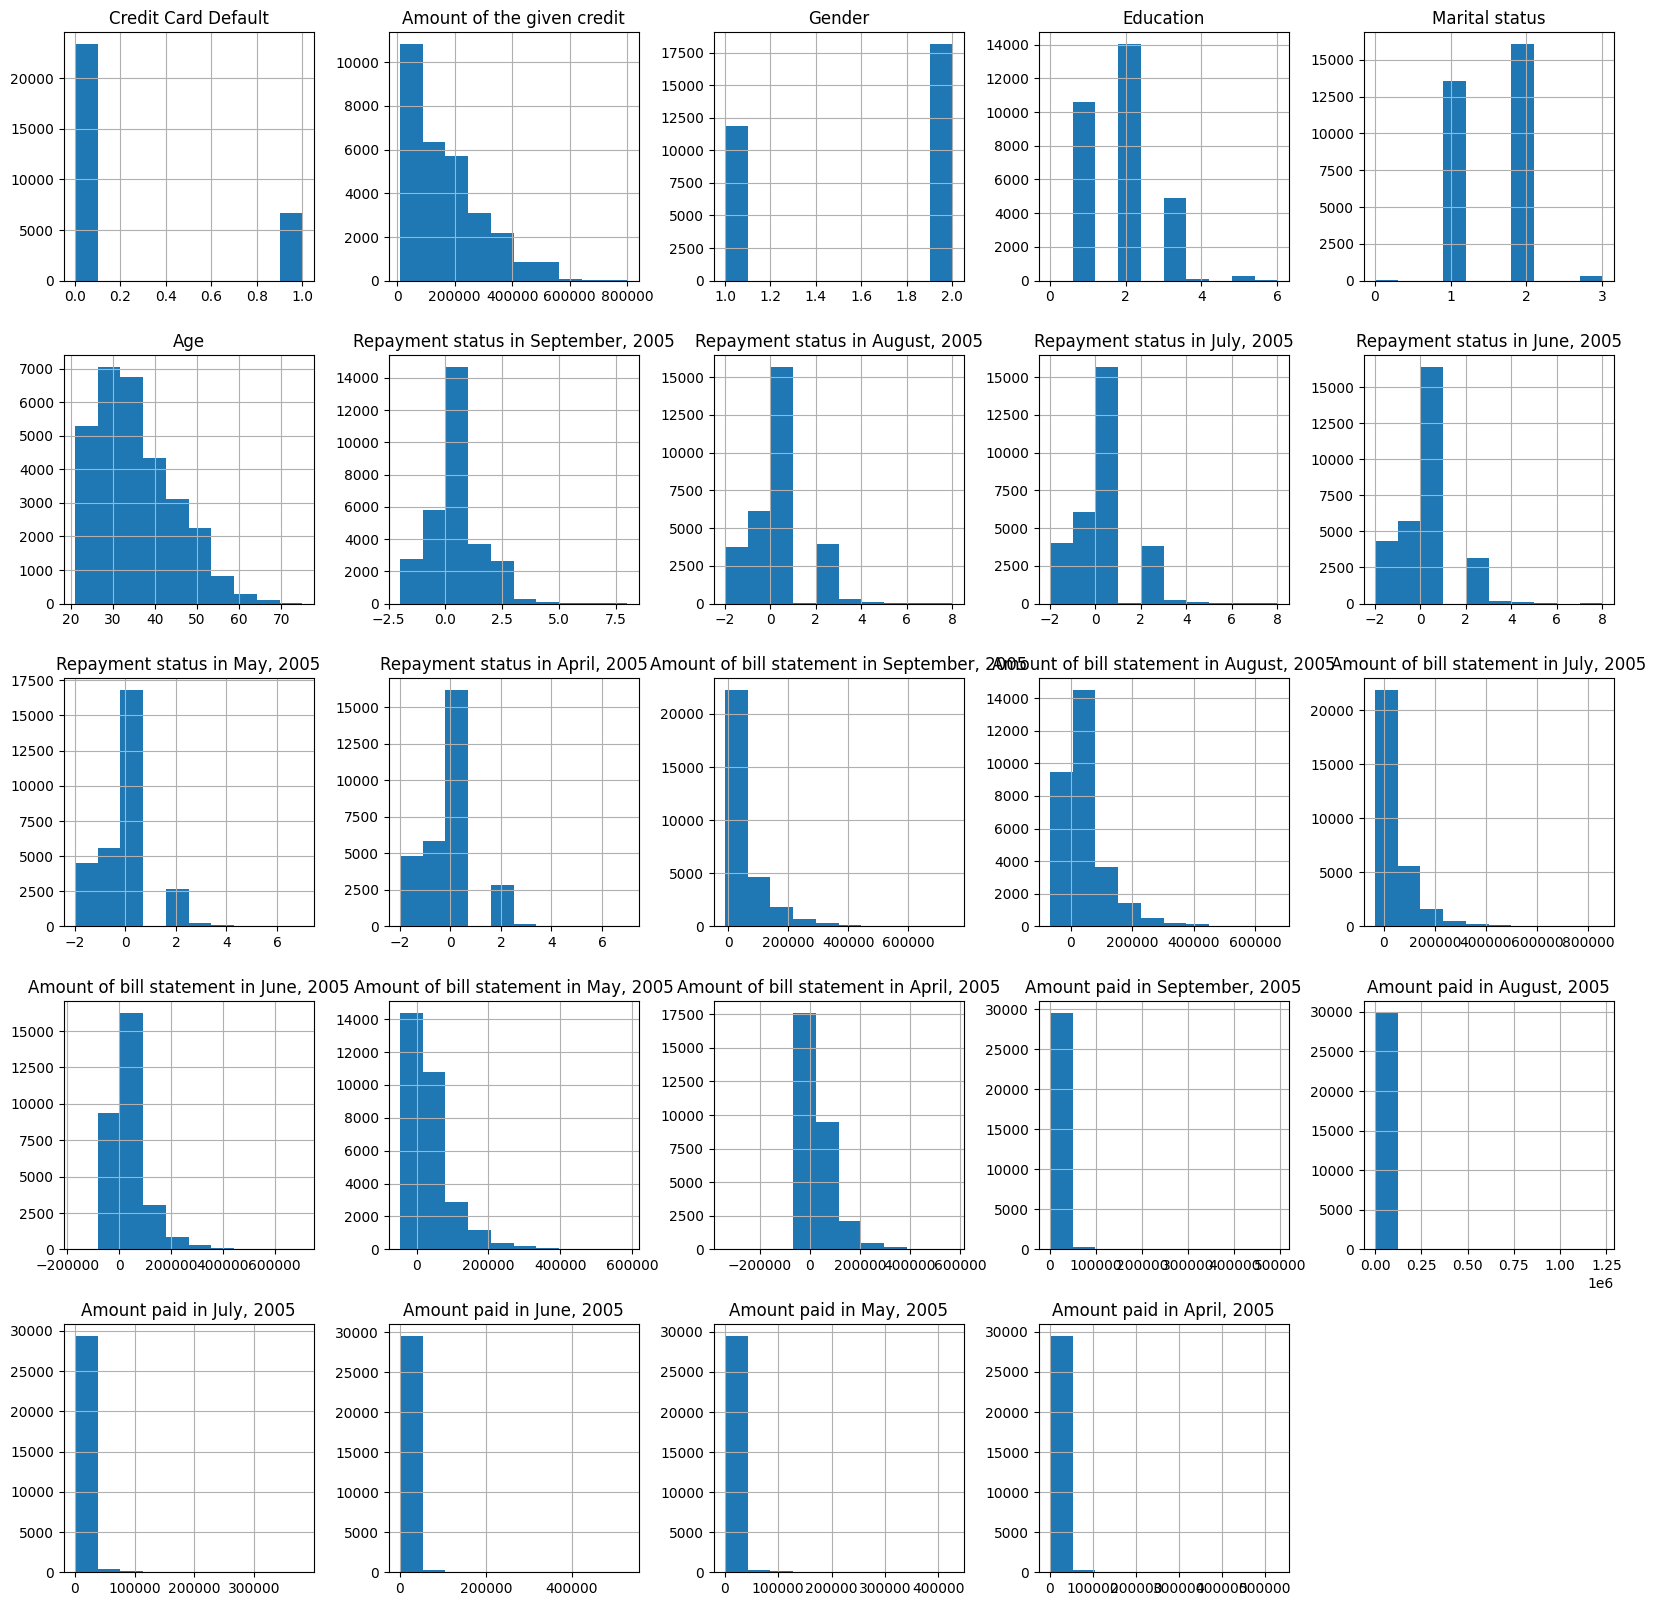

In [13]:
# Plot the histograms of the training dataframe
train_df.hist(bins=10, figsize=(20, 20))
plt.show()


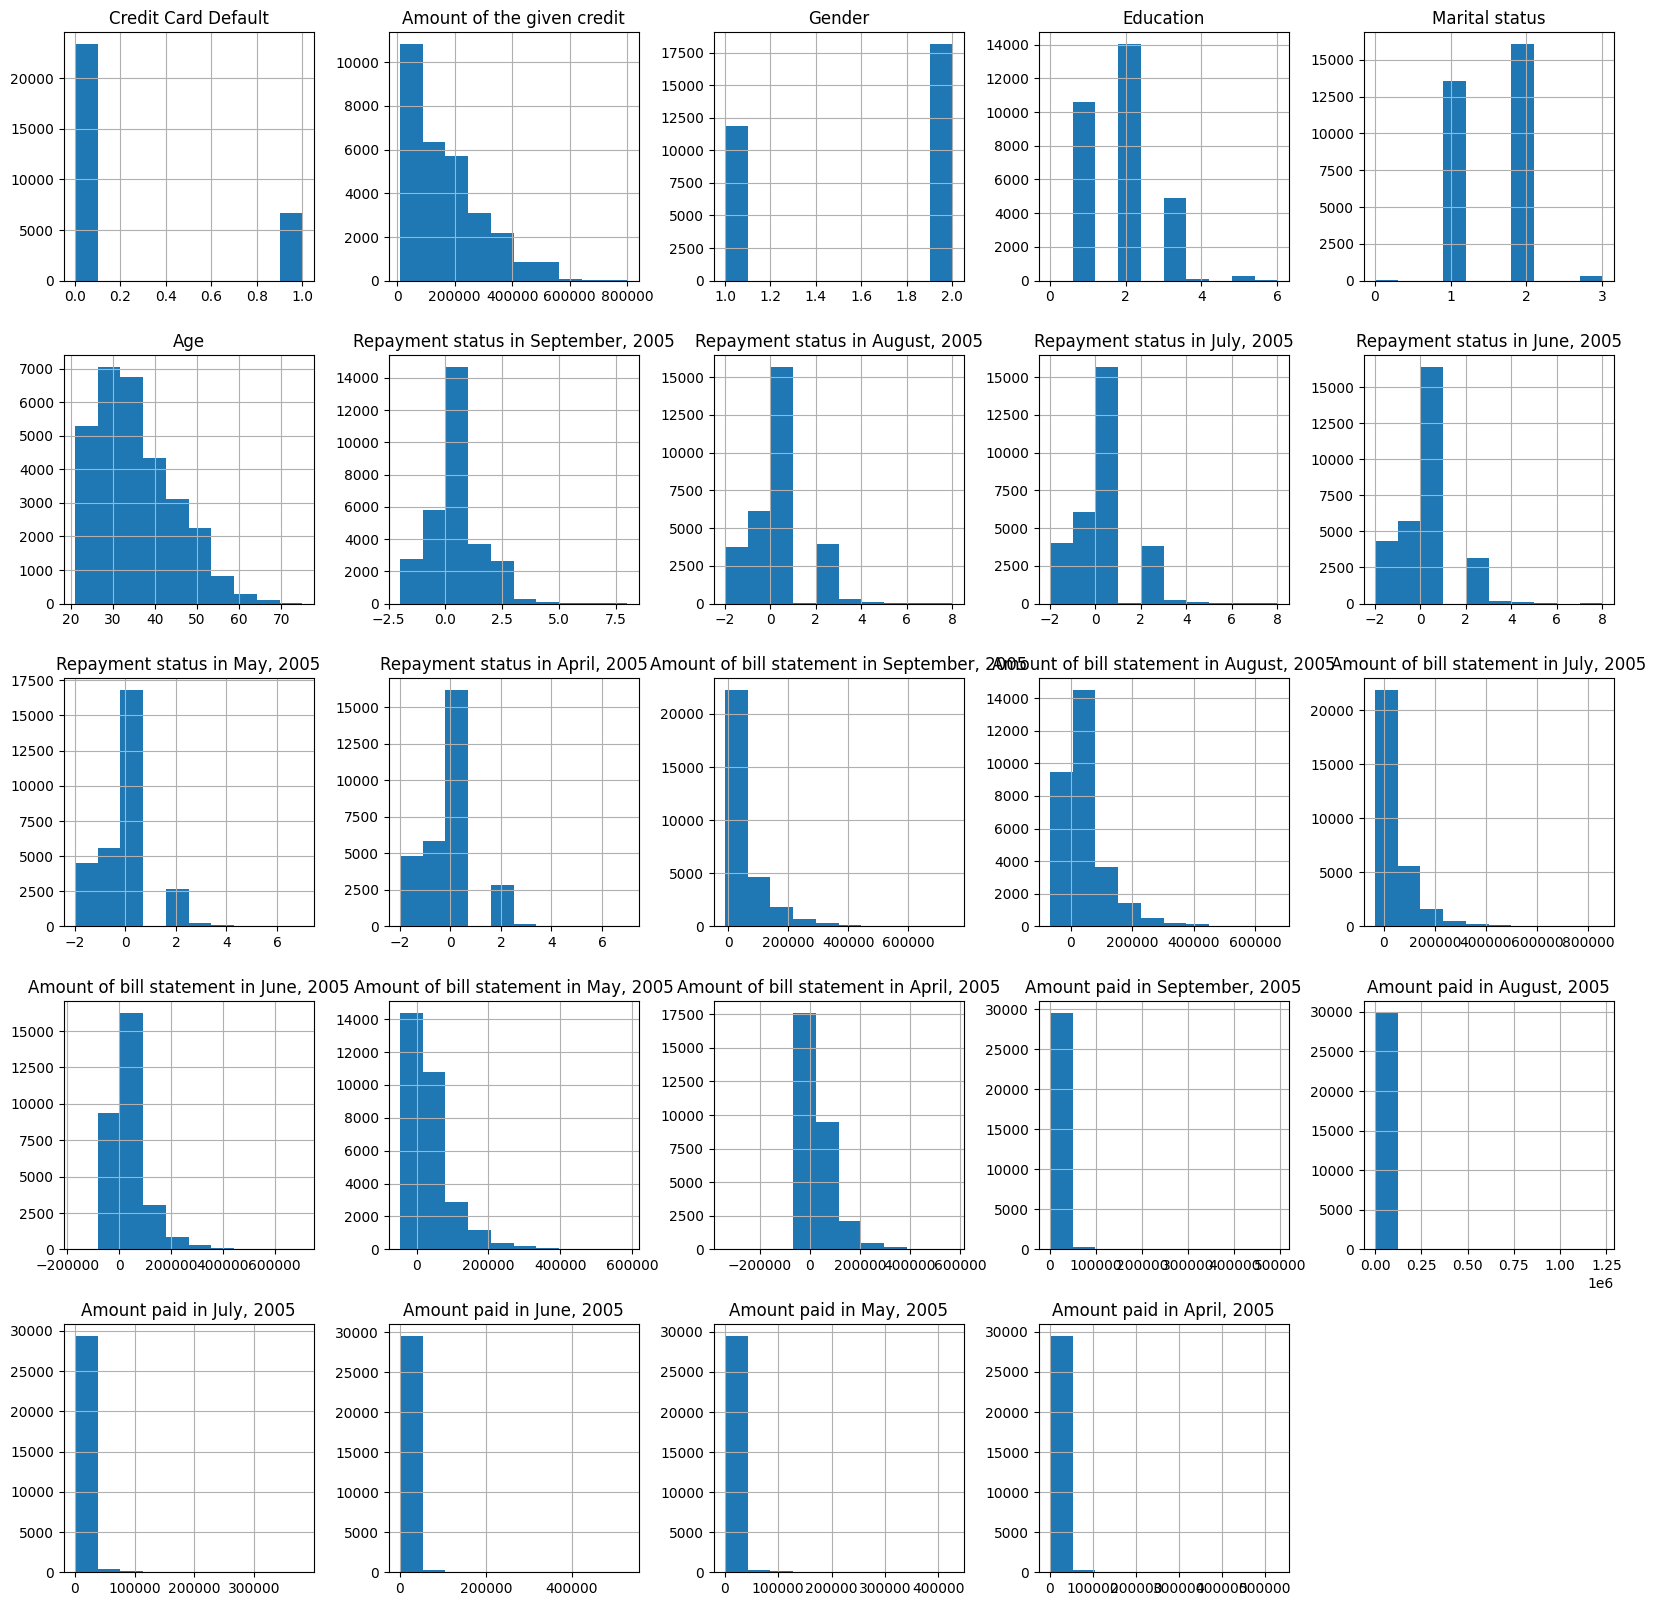

In [14]:
# Plot the histograms of the test dataframe
test_df.hist(bins=10, figsize=(20, 20))
plt.show()


## III. Data Pre-Processing

### a. Check for Missing Values on the Training and Test dataframes

In [15]:
# Print the missing values in the training dataframe
print("\n>> Missing values in train dataframe :\n", train_df.isnull().sum())


>> Missing values in train dataframe :
 Credit Card Default                            0
Amount of the given credit                     0
Gender                                         0
Education                                      0
Marital status                                 0
Age                                            0
Repayment status in September, 2005            0
Repayment status in August, 2005               0
Repayment status in July, 2005                 0
Repayment status in June, 2005                 0
Repayment status in May, 2005                  0
Repayment status in April, 2005                0
Amount of bill statement in September, 2005    0
Amount of bill statement in August, 2005       0
Amount of bill statement in July, 2005         0
Amount of bill statement in June, 2005         0
Amount of bill statement in May, 2005          0
Amount of bill statement in April, 2005        0
Amount paid in September, 2005                 0
Amount paid in August, 2005 

In [16]:
# Print the missing values in the test dataframe
print("\n>> Missing values in test dataframe :\n", test_df.isnull().sum())


>> Missing values in test dataframe :
 Credit Card Default                            0
Amount of the given credit                     0
Gender                                         0
Education                                      0
Marital status                                 0
Age                                            0
Repayment status in September, 2005            0
Repayment status in August, 2005               0
Repayment status in July, 2005                 0
Repayment status in June, 2005                 0
Repayment status in May, 2005                  0
Repayment status in April, 2005                0
Amount of bill statement in September, 2005    0
Amount of bill statement in August, 2005       0
Amount of bill statement in July, 2005         0
Amount of bill statement in June, 2005         0
Amount of bill statement in May, 2005          0
Amount of bill statement in April, 2005        0
Amount paid in September, 2005                 0
Amount paid in August, 2005  

### b. Looking for Correlations

In [17]:
# Create a correlation matrix of the training dataframe
correlationMatrix = train_df.corr()

# Print the correlation matrix of the training dataframe
print(correlationMatrix.columns)

Index(['Credit Card Default', 'Amount of the given credit', 'Gender',
       'Education', 'Marital status', 'Age',
       'Repayment status in September, 2005',
       'Repayment status in August, 2005', 'Repayment status in July, 2005',
       'Repayment status in June, 2005', 'Repayment status in May, 2005',
       'Repayment status in April, 2005',
       'Amount of bill statement in September, 2005',
       'Amount of bill statement in August, 2005',
       'Amount of bill statement in July, 2005',
       'Amount of bill statement in June, 2005',
       'Amount of bill statement in May, 2005',
       'Amount of bill statement in April, 2005',
       'Amount paid in September, 2005', 'Amount paid in August, 2005',
       'Amount paid in July, 2005', 'Amount paid in June, 2005',
       'Amount paid in May, 2005', 'Amount paid in April, 2005'],
      dtype='object')


In [18]:
# Print the correlation matrix of the training dataframe
correlationMatrix["Credit Card Default"].sort_values(ascending=False)


Credit Card Default                            1.000000
Repayment status in September, 2005            0.331649
Repayment status in August, 2005               0.268786
Repayment status in July, 2005                 0.234252
Repayment status in June, 2005                 0.221039
Repayment status in May, 2005                  0.211088
Repayment status in April, 2005                0.192512
Education                                      0.038325
Age                                            0.011005
Amount of bill statement in April, 2005       -0.001679
Amount of bill statement in May, 2005         -0.003687
Amount of bill statement in June, 2005        -0.005166
Amount of bill statement in July, 2005        -0.010390
Amount of bill statement in August, 2005      -0.010794
Amount of bill statement in September, 2005   -0.018290
Marital status                                -0.024420
Gender                                        -0.038752
Amount paid in April, 2005                    -0

<Axes: >

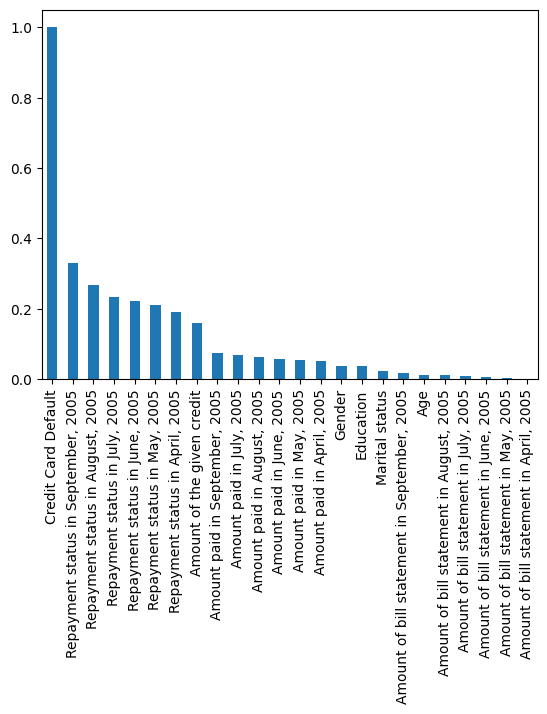

In [19]:
# Looking to compare the strenghts of the correlation with the absolute values instead
correlationMatrix["Credit Card Default"].abs().sort_values(ascending=False)
correlationMatrix["Credit Card Default"].abs().sort_values(ascending=False).plot(kind='bar')

In [20]:
# Print the correlation matrix of the training dataframe sorted by the absolute values
correlationMatrix_sorted = correlationMatrix["Credit Card Default"].abs().sort_values(ascending=False)
print(correlationMatrix_sorted)


Credit Card Default                            1.000000
Repayment status in September, 2005            0.331649
Repayment status in August, 2005               0.268786
Repayment status in July, 2005                 0.234252
Repayment status in June, 2005                 0.221039
Repayment status in May, 2005                  0.211088
Repayment status in April, 2005                0.192512
Amount of the given credit                     0.159296
Amount paid in September, 2005                 0.074303
Amount paid in July, 2005                      0.069627
Amount paid in August, 2005                    0.063889
Amount paid in June, 2005                      0.056760
Amount paid in May, 2005                       0.054227
Amount paid in April, 2005                     0.053284
Gender                                         0.038752
Education                                      0.038325
Marital status                                 0.024420
Amount of bill statement in September, 2005    0

### c. Scale/normalize numerical columns of the Training and Test dataframes

In [21]:
# Select the numerical columns of the training dataframe
numerical_cols = ['Amount of the given credit', 'Age', 'Amount of bill statement in September, 2005', 
                'Amount of bill statement in August, 2005', 'Amount of bill statement in July, 2005', 
                'Amount of bill statement in June, 2005', 'Amount of bill statement in May, 2005', 
                'Amount of bill statement in April, 2005', 'Amount paid in September, 2005', 
                'Amount paid in August, 2005', 'Amount paid in July, 2005', 'Amount paid in June, 2005', 
                'Amount paid in May, 2005', 'Amount paid in April, 2005']

# Scale the numerical columns of the training dataframe
scaler = StandardScaler()

# Fit the scaler to the training data
train_df[numerical_cols] = scaler.fit_transform(train_df[numerical_cols])

In [22]:
# Select the numerical columns of the test dataframe
numerical_cols = ['Amount of the given credit', 'Age', 'Amount of bill statement in September, 2005', 
                'Amount of bill statement in August, 2005', 'Amount of bill statement in July, 2005', 
                'Amount of bill statement in June, 2005', 'Amount of bill statement in May, 2005', 
                'Amount of bill statement in April, 2005', 'Amount paid in September, 2005', 
                'Amount paid in August, 2005', 'Amount paid in July, 2005', 'Amount paid in June, 2005', 
                'Amount paid in May, 2005', 'Amount paid in April, 2005']

# Scale the numerical columns of the test dataframe
scaler = StandardScaler()

# Fit the scaler to the test data
test_df[numerical_cols] = scaler.fit_transform(test_df[numerical_cols])

### d. Split the Training and Testing dataframes

In [23]:
# Split the training dataset into features and target variables
X_train = train_df.drop("Credit Card Default", axis=1)
y_train = train_df["Credit Card Default"]

# Split the testing dataset into features and target variables
X_test = test_df.drop("Credit Card Default", axis=1)
y_test = test_df["Credit Card Default"]

# Print the shape of the training and testing dataframes
print("X_train shape..:", X_train.shape)
print("X_test shape...:", X_test.shape)
print("y_train shape..:", y_train.shape)
print("y_test shape...:", y_test.shape)


X_train shape..: (30000, 23)
X_test shape...: (30000, 23)
y_train shape..: (30000,)
y_test shape...: (30000,)


## IV. Models Training and Optimisation

In [24]:
# Dictionary to store the best models and their scores
best_models = {}


## a. k-Nearest Neighbours (kNN)

In [25]:
# Store the instance of the k-nearest neighbors classifier
knn = KNeighborsClassifier()

# Create a dictionary of hyperparameters to tune
knn_params = {'n_neighbors': list(range(1, 50))}

# Perform grid search to find the best hyperparameters
knn_grid = GridSearchCV(knn, knn_params, cv=5, scoring='accuracy')

# Fit the grid search object to the training data
knn_grid.fit(X_train, y_train)

# Store the best model and its score
best_knn = knn_grid.best_estimator_
knn_score = knn_grid.best_score_

# Add the best model and its score to the dictionary
best_models['kNN'] = (best_knn, knn_score)


## b. Decision Trees

In [26]:
# Store the instance of the decision tree classifier
dt = DecisionTreeClassifier(random_state=42)

# Create a dictionary of hyperparameters to tune
dt_params = {'max_depth': list(range(1, 20))}

# Perform grid search to find the best hyperparameters
dt_grid = GridSearchCV(dt, dt_params, cv=5, scoring='accuracy')

# Fit the grid search object to the training data
dt_grid.fit(X_train, y_train)

# Store the best model and its score
best_dt = dt_grid.best_estimator_
dt_score = dt_grid.best_score_

# Add the best model and its score to the dictionary
best_models['Decision Tree'] = (best_dt, dt_score)


## c. Random Forest

In [27]:
# Store the instance of the random forest classifier
rf = RandomForestClassifier(random_state=42)

# Create a dictionary of hyperparameters to tune
rf_params = {'n_estimators': [10, 50, 100, 150, 200]}

# Perform grid search to find the best hyperparameters
rf_grid = GridSearchCV(rf, rf_params, cv=5, scoring='accuracy')

# Fit the grid search object to the training data
rf_grid.fit(X_train, y_train)

# Store the best model and its score
best_rf = rf_grid.best_estimator_
rf_score = rf_grid.best_score_

# Add the best model and its score to the dictionary
best_models['Random Forest'] = (best_rf, rf_score)


## d. Bagging

In [28]:
# Store the instance of bagging classifier
bag = BaggingClassifier(random_state=42)

# Create a dictionary of hyperparameters to tune
bag_params = {'n_estimators': [10, 50, 100, 150, 200]}

# Perform grid search to find the best hyperparameters
bag_grid = GridSearchCV(bag, bag_params, cv=5, scoring='accuracy')

# Fit the grid search object to the training data
bag_grid.fit(X_train, y_train)

# Store the best model and its score
best_bag = bag_grid.best_estimator_
bag_score = bag_grid.best_score_

# Add the best model and its score to the dictionary
best_models['Bagging'] = (best_bag, bag_score)


## e. AdaBoost

In [29]:
# Store the instance of adaboost classifier
ada = AdaBoostClassifier(random_state=42)

# Create a dictionary of hyperparameters to tune
ada_params = {'n_estimators': [10, 50, 100, 150, 200]}

# Perform grid search to find the best hyperparameters
ada_grid = GridSearchCV(ada, ada_params, cv=5, scoring='accuracy')

# Fit the grid search object to the training data
ada_grid.fit(X_train, y_train)

# Store the best model and its score
best_ada = ada_grid.best_estimator_
ada_score = ada_grid.best_score_

# Add the best model and its score to the dictionary
best_models['AdaBoost'] = (best_ada, ada_score)


## f. Support Vector Machine (SVM)

In [30]:
# Define the objective function for hyperparameter tuning
def svm_objective(trial, X, y):

    # Define the hyperparameters to tune
    C = trial.suggest_loguniform("C", 1e-1, 1e2)

    # Set the kernel to linear
    kernel = trial.suggest_categorical("kernel", ["linear"])

    # Set the kernel to rbf not using the below line because it takes a lot of time to run
    # kernel = trial.suggest_categorical("kernel", ["linear", "rbf"])
    
    # Store the instance of the SVM classifier
    svm = SVC(C=C, kernel=kernel, random_state=42)
    
    # Perform cross validation and store the accuracy
    score = cross_val_score(svm, X, y, cv=3, scoring="accuracy", n_jobs=-1)

    # Return the mean accuracy
    return score.mean()

# Create the study object
svm_study = optuna.create_study(direction="maximize")

# Optimize the objective function
svm_opt = partial(svm_objective, X=X_train, y=y_train)

# Perform hyperparameter tuning
svm_study.optimize(svm_opt, n_trials=5)

# Store the hyperparameters of the best model
best_svm = SVC(**svm_study.best_params, random_state=42)

# Fit the best model to the training data
best_svm.fit(X_train, y_train)

# Store the best score during cross-validation
svm_score = svm_study.best_value

# Add the best model and its score to the dictionary
best_models["SVM"] = (best_svm, svm_score)


[I 2023-03-19 13:48:49,529] A new study created in memory with name: no-name-c6ca0204-7e89-4c9b-b49b-4f2ec8bf6ad9
C:\Users\Carlos Alves\AppData\Local\Temp\ipykernel_10244\428469628.py:5: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  C = trial.suggest_loguniform("C", 1e-1, 1e2)
[I 2023-03-19 16:04:27,955] Trial 0 finished with value: 0.8110333333333334 and parameters: {'C': 20.124544008073755, 'kernel': 'linear'}. Best is trial 0 with value: 0.8110333333333334.
C:\Users\Carlos Alves\AppData\Local\Temp\ipykernel_10244\428469628.py:5: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  C = trial.suggest_loguniform("C", 1e-1, 1e2)
[I 2023-03-19 16:05:18,

### V. Select the Best Model

In [31]:
# Find the best model and its score
best_model_name, (best_model, best_score) = max(best_models.items(), key=lambda x: x[1][1])

# Print the best model and its score
print(f"\nBest Model.............: {best_model_name} with accuracy {best_score:.2%}")

# Print the best model's parameters
print("\n>> Best Model Parameters\n")

# Loop through the best model's parameters and print them in a new line
for key, value in best_model.get_params().items():
    print(key, ":", value)
    print("\n")



Best Model.............: Random Forest with accuracy 99.97%

>> Best Model Parameters

bootstrap : True


ccp_alpha : 0.0


class_weight : None


criterion : gini


max_depth : None


max_features : sqrt


max_leaf_nodes : None


max_samples : None


min_impurity_decrease : 0.0


min_samples_leaf : 1


min_samples_split : 2


min_weight_fraction_leaf : 0.0


n_estimators : 150


n_jobs : None


oob_score : False


random_state : 42


verbose : 0


warm_start : False




### VI. Evaluate the Best Model on the Test set

In [32]:
# Predict the target variable for the test dataset
y_pred = best_model.predict(X_test)

# Store the accuracy score
accuracy = accuracy_score(y_test, y_pred) * 100

# Print the accuracy score, confusion matrix and classification report
print("\nAccuracy..........: {:.2f}%".format(accuracy))
print("\nConfusion Matrix..:\n\n", confusion_matrix(y_test, y_pred))
print("\n>> Classification Report\n\n", classification_report(y_test, y_pred))



Accuracy..........: 99.97%

Confusion Matrix..:

 [[23360     4]
 [    4  6632]]

>> Classification Report

               precision    recall  f1-score   support

         0.0       1.00      1.00      1.00     23364
         1.0       1.00      1.00      1.00      6636

    accuracy                           1.00     30000
   macro avg       1.00      1.00      1.00     30000
weighted avg       1.00      1.00      1.00     30000



### VII. Plot Hyperparameter vs Accuracy for each algorithm

In [33]:
# Create a new empty figure with a size of 15 x 10
plt.figure(figsize=(15, 10))


<Figure size 1500x1000 with 0 Axes>

<Figure size 1500x1000 with 0 Axes>

## a. k-Nearest Neighbours (kNN)

Text(0, 0.5, 'Accuracy')

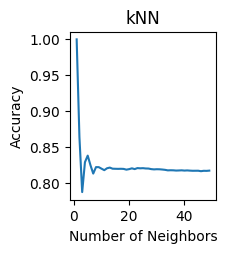

In [34]:
# Create a subplot with 2 rows and 3 columns
plt.subplot(231)

# Plot the training and testing accuracies
plt.plot(list(range(1, 50)), knn_grid.cv_results_['mean_test_score'])

# Set the title, x-axis label and y-axis label
plt.title('kNN')
plt.xlabel('Number of Neighbors')
plt.ylabel('Accuracy')


The plot shows the relationship between the number of neighbors and accuracy in the kNN algorithm is complex and non-linear. The observed behaviour in the given dataset highlights the importance of selecting an appropriate value for the number of neighbors to maximise the algorithm's performance. Furthermore, the fluctuations in accuracy as the number of neighbors increases demonstrate the trade-off between overfitting and generalisation in the kNN algorithm. Overall, finding the optimal number of neighbors is crucial for achieving the best possible performance in classification or regression tasks using the k-Nearest Neighbors algorithm.

## b. Decison Tree

Text(0, 0.5, 'Accuracy')

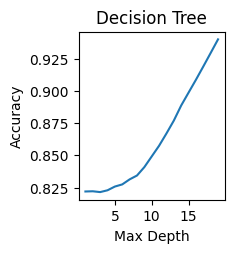

In [35]:
# Create a subplot with 2 rows and 3 columns
plt.subplot(232)

# Plot the training and testing accuracies
plt.plot(list(range(1, 20)), dt_grid.cv_results_['mean_test_score'])

# Set the title, x-axis label and y-axis label
plt.title('Decision Tree')
plt.xlabel('Max Depth')
plt.ylabel('Accuracy')


The plot shows the relationship between the maximum depth and accuracy in Decision Trees is intricate, with the accuracy exhibiting different behaviors at various depth levels. The observed dataset highlights the importance of selecting an appropriate maximum depth to achieve the best performance while avoiding overfitting. Initially, the model's accuracy plateaus due to its simplicity, but it increases as the maximum depth grows, allowing the algorithm to capture more complex patterns in the data. However, as the tree depth continues to increase, there is a risk of overfitting, which should be considered when selecting the optimal maximum depth. Overall, finding the right balance between model complexity and generalization is crucial for maximizing the performance of Decision Trees in classification and regression tasks.

## c. Random Forest

Text(0, 0.5, 'Accuracy')

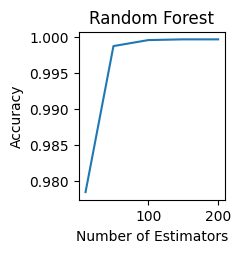

In [36]:
# Create a subplot with 2 rows and 3 columns
plt.subplot(233)

# Plot the training and testing accuracies
plt.plot([10, 50, 100, 150, 200], rf_grid.cv_results_['mean_test_score'])

# Set the title, x-axis label and y-axis label
plt.title('Random Forest')
plt.xlabel('Number of Estimators')
plt.ylabel('Accuracy')


The plot shows the relationship between the number of estimators and the accuracy in the Random Forest algorithm, as seen in the given dataset, highlights the importance of selecting an appropriate number of estimators to maximize performance while considering computational efficiency. The accuracy increases linearly as the number of estimators grows, demonstrating the benefits of ensemble learning in reducing errors and improving generalization. However, balancing the number of estimators with computational costs and potential diminishing returns is crucial. Overall, finding the optimal number of estimators is essential for achieving the best possible performance in classification or regression tasks using the Random Forest algorithm.

## d. Bagging

Text(0, 0.5, 'Accuracy')

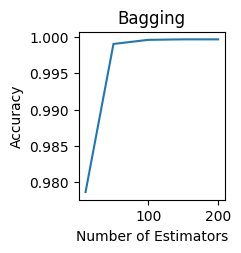

In [37]:
# Create a subplot with 2 rows and 3 columns
plt.subplot(234)

# Plot the training and testing accuracies
plt.plot([10, 50, 100, 150, 200], bag_grid.cv_results_['mean_test_score'])

# Set the title, x-axis label and y-axis label
plt.title('Bagging')
plt.xlabel('Number of Estimators')
plt.ylabel('Accuracy')


The plot shows the relationship between the number of estimators and the accuracy in the Bagging algorithm, as seen in the given dataset, highlights the importance of selecting an appropriate number of estimators to maximize performance while considering computational efficiency. Furthermore, the accuracy increases linearly as the number of estimators grows, demonstrating the benefits of ensemble learning in reducing errors and improving generalization. However, balancing the number of estimators with computational costs and the potential for diminishing returns is crucial. Overall, finding the optimal number of estimators is essential for achieving the best possible performance in classification or regression tasks using the Bagging algorithm.

## e. AdaBoost

Text(0, 0.5, 'Accuracy')

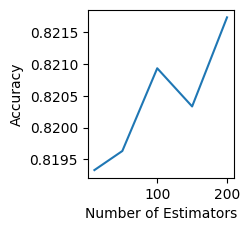

In [38]:
# Create a subplot with 2 rows and 3 columns
plt.subplot(235)

# Plot the training and testing accuracies
plt.plot([10, 50, 100, 150, 200], ada_grid.cv_results_['mean_test_score'])

# Set the title, x-axis label and y-axis label
plt.xlabel('Number of Estimators')
plt.ylabel('Accuracy')


The plot shows the relationship between the number of estimators and the accuracy in the AdaBoost algorithm, as seen in the given dataset, highlights the importance of selecting an appropriate number of estimators to maximize performance while avoiding overfitting. The accuracy initially increases linearly as the number of estimators grows, but at a certain point, it starts to decrease, potentially due to overfitting. Afterwards, the accuracy rises linearly again, suggesting that the model can somewhat overcome overfitting. Finding the optimal number of estimators is essential for achieving the best possible performance in classification or regression tasks using the AdaBoost algorithm while considering the trade-offs between model complexity and generalization.

## f. Support Vector Machine (SVM)

Text(0, 0.5, 'Accuracy')

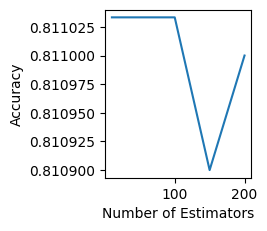

In [40]:
# Create a subplot with 2 rows and 3 columns
plt.subplot(236)
# Plot the training and testing accuracies
plt.plot([10, 50, 100, 150, 200], svm_study.trials_dataframe()['value'])

# Set the title, x-axis label and y-axis label
plt.xlabel('Number of Estimators')
plt.ylabel('Accuracy')


The plot shows the relationship between the number of estimators and the accuracy in the ensemble of SVMs, as seen in the given dataset, highlights the importance of selecting an appropriate number of estimators to maximize performance while considering the potential for overfitting and increased complexity. Furthermore, the accuracy remains relatively stable as the number of estimators increases to a certain point, after which it briefly drops before increasing linearly. This behaviour suggests that finding the optimal number of estimators is essential for achieving the best possible performance in classification or regression tasks using an ensemble of SVMs, while considering the trade-offs between model complexity and generalization.